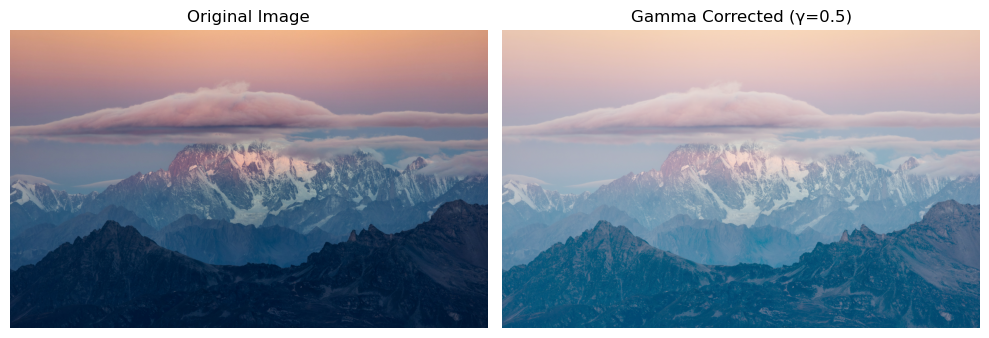

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    # 1️⃣ Normalize image to [0,1]
    normalized = image / 255.0
    
    # 2️⃣ Apply power-law transformation
    corrected = np.power(normalized, gamma)
    
    # 3️⃣ Convert back to uint8
    corrected = np.uint8(corrected * 255)
    
    return corrected


# 🔹 Load image (change path if needed)
image = cv2.imread("D:/Wallpers/123.jpg")

# Convert BGR to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply gamma correction
gamma_value = 0.5   # try 0.5, 1.5, 2.0 etc
corrected_image = gamma_correction(image_rgb, gamma_value)

# 🔹 Display images side by side
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(corrected_image)
plt.title(f"Gamma Corrected (γ={gamma_value})")
plt.axis("off")

plt.tight_layout()
plt.show()

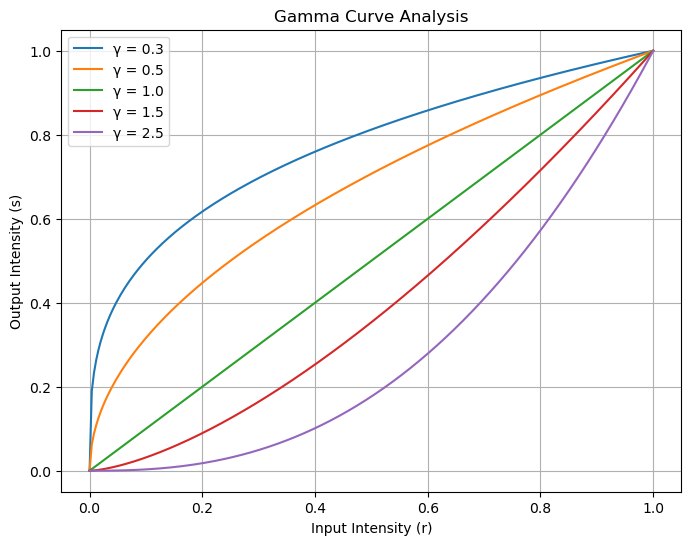

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Generate intensity values r in [0,1]
r = np.linspace(0, 1, 256)

# 2️⃣ Define at least 5 gamma values
gamma_values = [0.3, 0.5, 1.0, 1.5, 2.5]

# 3️⃣ Plot all curves in one figure
plt.figure(figsize=(8,6))

for gamma in gamma_values:
    s = np.power(r, gamma)
    plt.plot(r, s, label=f'γ = {gamma}')

# Formatting the plot
plt.title("Gamma Curve Analysis")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.legend()
plt.grid(True)

plt.show()

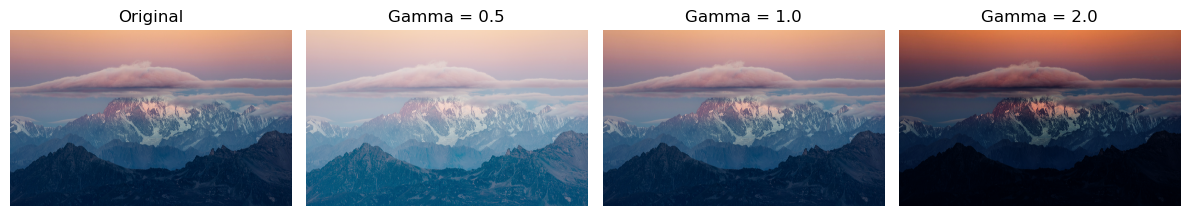

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    # Normalize to [0,1]
    normalized = image / 255.0
    
    # Apply gamma transformation
    corrected = np.power(normalized, gamma)
    
    # Convert back to uint8
    corrected = np.uint8(corrected * 255)
    
    return corrected


# 🔹 Load image
image = cv2.imread("D:/Wallpers/123.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gamma values for comparison
gamma_values = [0.5, 1.0, 2.0]

# Create figure
plt.figure(figsize=(12,4))

# Show original image first
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

# Apply and display each gamma
for i, gamma in enumerate(gamma_values):
    corrected = gamma_correction(image_rgb, gamma)
    
    plt.subplot(1, 4, i+2)
    plt.imshow(corrected)
    plt.title(f"Gamma = {gamma}")
    plt.axis("off")

plt.tight_layout()
plt.show()

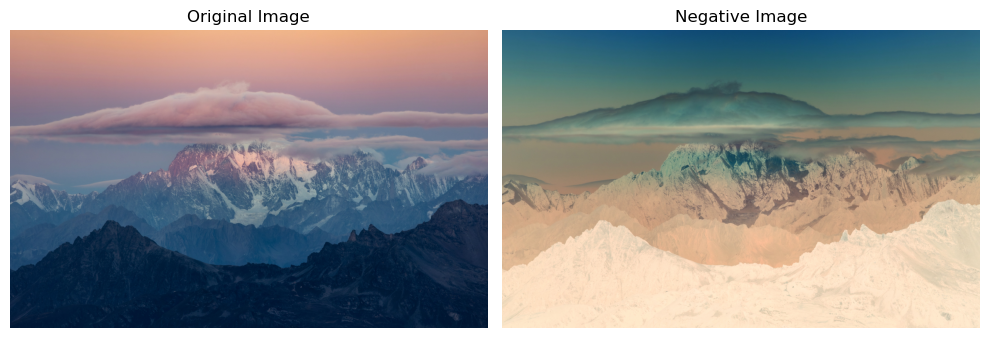

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_negative(image):
    # Create empty image with same shape
    negative = np.zeros_like(image)
    
    # Apply formula manually: s = 255 - r
    rows, cols, channels = image.shape
    
    for i in range(rows):
        for j in range(cols):
            for k in range(channels):
                negative[i, j, k] = 255 - image[i, j, k]
    
    return negative


# 🔹 Load image
image = cv2.imread("D:/Wallpers/123.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply negative transformation
negative_image = image_negative(image_rgb)

# Display results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis("off")

plt.tight_layout()
plt.show()

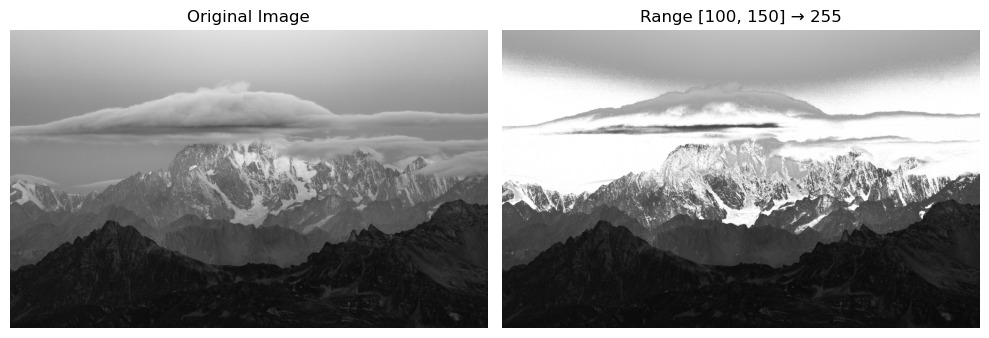

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def intensity_range_mapping(image, A, B):
    # Create copy to avoid modifying original
    output = image.copy()
    
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            if A <= image[i, j] <= B:
                output[i, j] = 255
            else:
                output[i, j] = image[i, j]
    
    return output


# 🔹 Load grayscale image
image = cv2.imread("D:/Wallpers/123.jpg", 0)

# Define range
A = 100
B = 150

# Apply transformation
mapped_image = intensity_range_mapping(image, A, B)

# Display results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mapped_image, cmap='gray')
plt.title(f"Range [{A}, {B}] → 255")
plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Gamma Correction
def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    corrected = np.uint8(corrected * 255)
    return corrected


# 🔹 Intensity Range Mapping
def intensity_range_mapping(image, A, B):
    output = image.copy()
    
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            if A <= image[i, j] <= B:
                output[i, j] = 255
            else:
                output[i, j] = image[i, j]
                
    return output

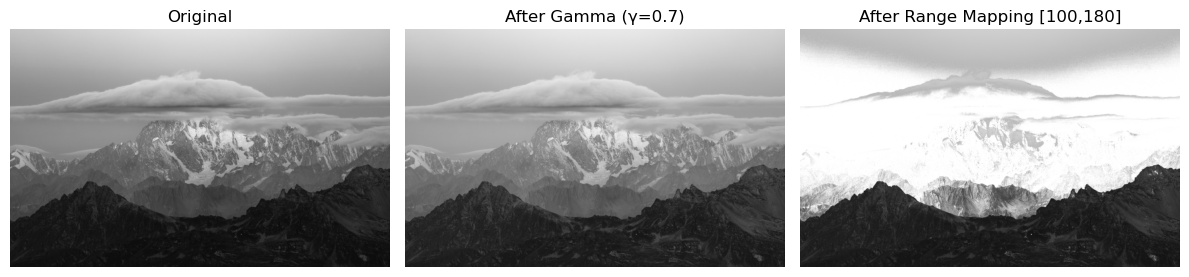

In [9]:
# 1️⃣ Read image (grayscale recommended)
image = cv2.imread("D:/Wallpers/123.jpg", 0)

# 2️⃣ Apply gamma correction
gamma_value = 0.7
gamma_image = gamma_correction(image, gamma_value)

# 3️⃣ Apply intensity mapping
A = 100
B = 180
final_image = intensity_range_mapping(gamma_image, A, B)

# 4️⃣ Display results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gamma_image, cmap='gray')
plt.title(f"After Gamma (γ={gamma_value})")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(final_image, cmap='gray')
plt.title(f"After Range Mapping [{A},{B}]")
plt.axis("off")

plt.tight_layout()
plt.show()